In [33]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
import sys
sys.path.append('../src')

In [36]:
from d00_utils.db_utils import dbReadWriteClean, dbReadWriteViews
io_clean = dbReadWriteClean()
io_views = dbReadWriteViews()

In [37]:
measurement_abstract_rpt_df = io_clean.get_table("measurement_abstract_rpt")
print(measurement_abstract_rpt_df.shape)
measurement_abstract_rpt_df.head()

(1568351, 5)


,studyidk,measabstractnumber,name,value,unitname
0,2882,2,(P1/2t)AVM,2.491754,cm2
1,2882,12,Area TSVI,3.606348,cm2
2,2882,43,FE(el-ps4),37.032087,%
3,2882,46,FE(MDD-ps4),35.095355,%
4,2882,125,P1/2t VM,88.291224,ms


In [39]:
instances_w_labels_df = io_views.get_table('instances_w_labels')
instances_w_labels_df = instances_w_labels_df[(instances_w_labels_df['view']=='a2c') | (instances_w_labels_df['view']=='a4c')]
print(instances_w_labels_df.shape)
instances_w_labels_df.head()

(13478, 5)


,sopinstanceuid,filename,instanceidk,view,studyidk
1,1.2.840.113663.1500.1.365900332.3.7.20120703.9...,8Z0BWZGH,696112,a4c,39531
5,1.2.840.113663.1500.1.365900332.3.12.20120704....,8ZGVB5TY,696426,a4c,39552
6,1.2.840.113663.1500.1.365900332.3.16.20120704....,8ZGVB7C1,696430,a2c,39552
7,1.2.840.113663.1500.1.365900332.3.4.20120704.1...,8ZGVCN6C,696438,a4c,39553
8,1.2.840.113663.1500.1.365900332.3.16.20120704....,8ZGVCPFW,696467,a2c,39553


In [38]:
frames_by_volume_mask_df = io_views.get_table('frames_by_volume_mask')
print(frames_by_volume_mask_df.shape)
frames_by_volume_mask_df.head()

(72527, 9)


,instanceidk,indexinmglist,studyidk,frame,view_name,view_exists,view_only,ventricle_only,cycle_only
0,57164,1,2882,15,a4c_ven_ed,t,a4c,ven,ed
1,58207,1,2966,8,a4c_ven_ed,t,a4c,ven,ed
2,102950,0,5898,17,a4c_ven_ed,t,a4c,ven,ed
3,105943,1,6085,62,a4c_ven_ed,t,a4c,ven,ed
4,105951,0,6086,7,a4c_ven_ed,t,a4c,ven,ed


In [41]:
def get_recommendation(row):
    return 'normal' if row['value'] >= 60 else 'abnormal' if row['value'] <= 40 else 'greyzone'

In [ ]:
start_df = measurement_abstract_rpt_df
filter_df = start_df

In [42]:
filter_df = filter_df[filter_df['name'].str.contains('FE')]
filter_df = filter_df[filter_df['value']>=0]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

1568351
85719
0.05465549484777323


In [43]:
filter_df['name'].value_counts()

FE(MDD-ps4)             17222
FE(el-ps4)              16332
FE(Teich)               11741
FE(cúbico)              11736
FE(MDD-ps2)              9476
FE(el-ps2)               9107
FE(MDD-bp)               8938
FE (Bi-Plane) (aCMQ)      591
FE A4C (aCMQ)             262
FE (HM)_phl               250
FEVI Bipl                  49
FE(MDD-bp)esf              12
FE_3D-Vol.                  3
Name: name, dtype: int64

In [44]:
filter_df = filter_df[filter_df['name'].str.contains('ps4')]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

1568351
33554
0.02139444550358944


In [45]:
filter_df['name'].value_counts()

FE(MDD-ps4)    17222
FE(el-ps4)     16332
Name: name, dtype: int64

In [46]:
filter_df = filter_df[filter_df['name'].str.contains('MDD')]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

1568351
17222
0.01098096025698329


In [47]:
filter_df.head()

,studyidk,measabstractnumber,name,value,unitname
3,2882,46,FE(MDD-ps4),35.095355,%
49,2966,46,FE(MDD-ps4),47.570583,%
155,5898,54,FE(MDD-ps4),30.191358,%
216,6085,46,FE(MDD-ps4),43.677717,%
260,6086,46,FE(MDD-ps4),56.657825,%


In [48]:
filter_df['value'].describe()

count    17222.000000
mean        59.425990
std         12.316584
min          3.069337
25%         53.584282
50%         60.688535
75%         67.546831
max         94.035998
Name: value, dtype: float64

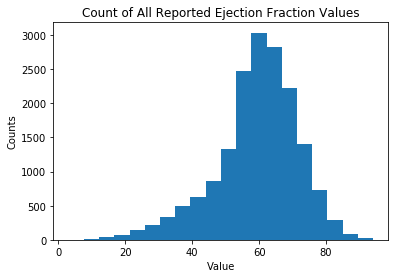

In [49]:
plt.title(f'Count of All Reported Ejection Fraction Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(filter_df['value'], bins=20);

In [50]:
filter_df['recommendation'] = filter_df.apply(get_recommendation, axis=1)

In [51]:
filter_df['recommendation'].value_counts()

normal      9092
greyzone    6751
abnormal    1379
Name: recommendation, dtype: int64

In [52]:
filter_df['recommendation'].value_counts()/filter_df['recommendation'].value_counts().sum()

normal      0.527929
greyzone    0.391999
abnormal    0.080072
Name: recommendation, dtype: float64

In [53]:
filter_df = filter_df[filter_df['studyidk'].isin(instances_w_labels_df['studyidk'].unique())]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

1568351
7806
0.0049772021696673765


In [54]:
filter_df = filter_df[filter_df['studyidk'].isin(frames_by_volume_mask_df['studyidk'].unique())]
print(len(start_df))
print(len(filter_df))
print(len(filter_df)/len(start_df))

1568351
7805
0.004976564557296167


In [55]:
filter_df['value'].describe()

count    7805.000000
mean       60.288264
std        12.560477
min         5.576720
25%        54.172151
50%        61.485345
75%        68.685309
max        94.035998
Name: value, dtype: float64

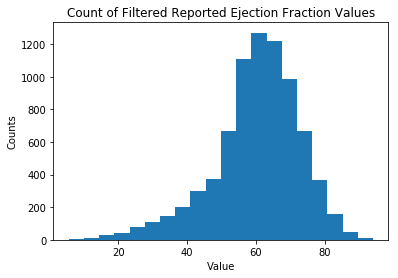

In [56]:
plt.title(f'Count of Filtered Reported Ejection Fraction Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(filter_df['value'], bins=20);

In [57]:
filter_df['recommendation'].value_counts()

normal      4354
greyzone    2882
abnormal     569
Name: recommendation, dtype: int64

In [58]:
filter_df.head()

,studyidk,measabstractnumber,name,value,unitname,recommendation
42925,39531,92,FE(MDD-ps4),30.358275,%,abnormal
43179,39552,121,FE(MDD-ps4),55.920676,%,greyzone
43217,39553,108,FE(MDD-ps4),48.403448,%,greyzone
43234,39555,92,FE(MDD-ps4),60.866452,%,normal
43275,39557,92,FE(MDD-ps4),26.676257,%,abnormal
